## import libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import random
import tensorflow.keras as keras
from tensorflow.keras.utils import load_img, img_to_array, array_to_img, to_categorical
from tensorflow.keras.preprocessing import image
import tensorflow as tf

## configure gpu if available for tensorflow

In [2]:
import tensorflow as tf
for gpu in tf.config.list_physical_devices("GPU"):
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA GeForce RTX 4050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9



## function that can extract file location with required class

In [4]:
def is_subarray_present(array_2d, array_1d):
    answer = tf.reduce_any(tf.reduce_all(tf.equal(array_2d, array_1d), axis=1))
    return answer.numpy()


def get_needed_name_of_image_with_label(label1, label2, input_dir):
    label1 = tf.convert_to_tensor(label1)
    label2 = tf.convert_to_tensor(label2)
    
    address = []
    input_img_paths = [os.path.join(input_dir, fname) 
         for fname in os.listdir(input_dir) 
             if fname.endswith('png')]

    for x in input_img_paths:
        image_x = img_to_array(load_img(x, target_size=(img_breadth, img_length) ))
        img_x_adjust = image_x.reshape((np.size(image_x,0)*np.size(image_x,1),3))


        img_x_adjust = tf.convert_to_tensor(img_x_adjust)
        

        label_present1 = is_subarray_present(img_x_adjust, label1)
        label_present2 = is_subarray_present(img_x_adjust, label2)
        
        if ( (label_present1 == True) or (label_present1 == True) ):
            address.append(x)
        else:
            pass
       
    return address

## perform extraction on training and validation folder

In [5]:
img_breadth = 2448
img_length = 3264

In [6]:
all_train_address = '../../../../Data/Data_May_5th_2025/Mapillary_Vistas/training/v2.0/labels/'

In [7]:
needed_train_address = get_needed_name_of_image_with_label([210.0, 60.0, 60.0], [250.0, 170.0, 35.0], all_train_address)

In [8]:
all_val_address = '../../../../Data/Data_May_5th_2025/Mapillary_Vistas/validation/v2.0/labels/'

In [9]:
needed_val_address = get_needed_name_of_image_with_label([210.0, 60.0, 60.0], [250.0, 170.0, 35.0], all_val_address)

In [10]:
len(needed_train_address)

1484

In [11]:
print(needed_train_address[0])

../../../../Data/Data_May_5th_2025/Mapillary_Vistas/training/v2.0/labels/-0C1J9CvgFP4BTVLXNeNZA.png


In [12]:
len(needed_val_address)

184

In [13]:
print(needed_val_address[0])

../../../../Data/Data_May_5th_2025/Mapillary_Vistas/validation/v2.0/labels/-9y4NjcjdoPFMs5wwC7otg.png


## save results to csv files for future use

In [14]:
needed_train_address_pd=pd.DataFrame(needed_train_address, columns=['training_address'])

In [15]:
needed_train_address_pd.to_csv('train_address.csv', index = False)

In [16]:
needed_val_address_pd=pd.DataFrame(needed_val_address, columns=['val_address'])

In [17]:
needed_val_address_pd.to_csv('val_address.csv', index=False)

## get equivalent image addresses from the label address
#### example derive image location by modifying label location as shown below
#### label location = '../../../../Data/Data_May_5th_2025/Mapillary_Vistas/training/v2.0/labels/_Jy-kj5nSmcQ_NlyYcudyw.png'
#### image location equivalent = '../../../../Data/Data_May_5th_2025/Mapillary_Vistas/training/images/_Jy-kj5nSmcQ_NlyYcudyw.jpg'


In [18]:
def modify_address(x):
    x1 = x.split("v2.0")
    x2 = x1[1].split("labels")
    x3 = x2[1].split("png")
    y = x1[0] + 'images' + x3[0] + 'jpg'
    return y

In [19]:
modified_needed_train_address_for_image = [modify_address(x) for x in needed_train_address]
modified_needed_train_address_for_image[0]

'../../../../Data/Data_May_5th_2025/Mapillary_Vistas/training/images/-0C1J9CvgFP4BTVLXNeNZA.jpg'

In [20]:
modified_needed_val_address_for_image = [modify_address(x) for x in needed_val_address]
modified_needed_val_address_for_image[0]

'../../../../Data/Data_May_5th_2025/Mapillary_Vistas/validation/images/-9y4NjcjdoPFMs5wwC7otg.jpg'

## a function that will enable display of only the class object--traffic-cone [210, 60, 60] and construction--barrier--temporary [250, 170, 35]

In [21]:
def convert_color_to_mask_class (x, img_breadth, img_length, labelA, labelB ):
   
    y = np.zeros((img_breadth, img_length, 1))
    x = tf.convert_to_tensor(x)
    y[:,:,0] = tf.where(  ((x[:,:,0]==labelA[0])   & (x[:,:,1]==labelA[1])   & (x[:,:,2]==labelA[2]))  , 1 , 
               tf.where(  ((x[:,:,0]==labelB[0])   & (x[:,:,1]==labelB[1])   & (x[:,:,2]==labelB[2]))  , 1 ,                                                                                 
                   0 ))
    return y

## read and display image , label and class focused label i for train

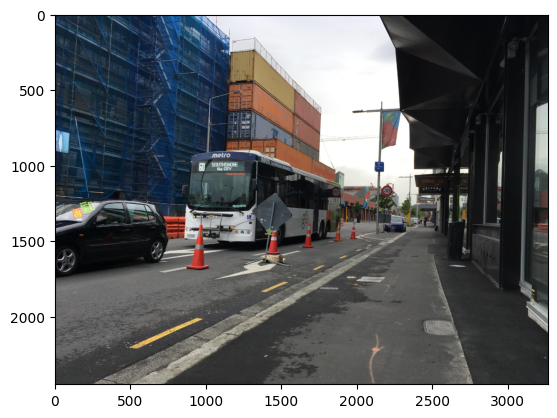

In [22]:
i = 3
image_train_i = img_to_array(load_img(modified_needed_train_address_for_image[i], target_size=(img_breadth, img_length) ))
plt.imshow(array_to_img(image_train_i))

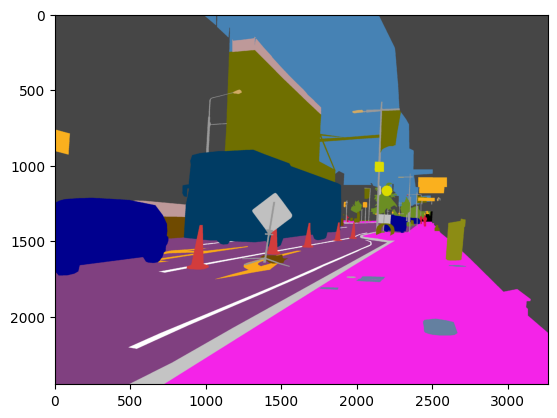

In [23]:
label_train_i = img_to_array(load_img(needed_train_address[i], target_size=(img_breadth, img_length) ))
plt.imshow(array_to_img(label_train_i))

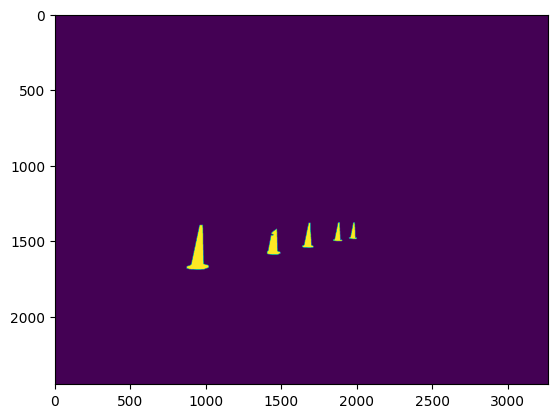

In [24]:
label_train_i_class_focused = convert_color_to_mask_class (label_train_i, img_breadth, img_length, [210, 60, 60], [250, 170, 35])
plt.imshow(array_to_img(label_train_i_class_focused))

## read and display image , label and class focused label i for val

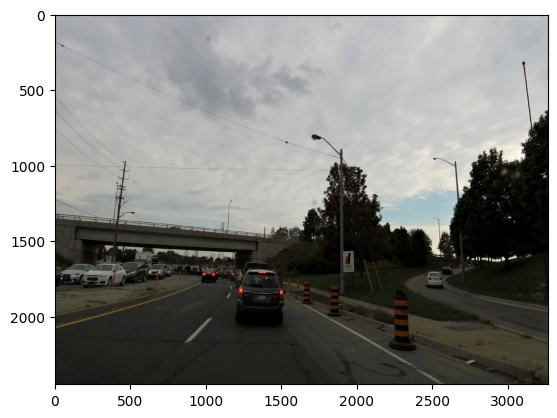

In [25]:
i = 9
image_val_i = img_to_array(load_img(modified_needed_val_address_for_image[i], target_size=(img_breadth, img_length) ))
plt.imshow(array_to_img(image_val_i))

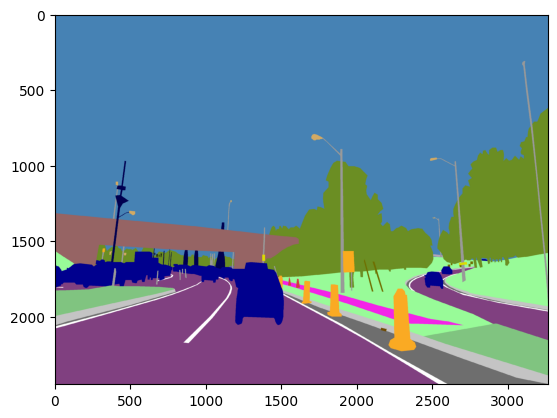

In [26]:
label_val_i = img_to_array(load_img(needed_val_address[i], target_size=(img_breadth, img_length) ))
plt.imshow(array_to_img(label_val_i))

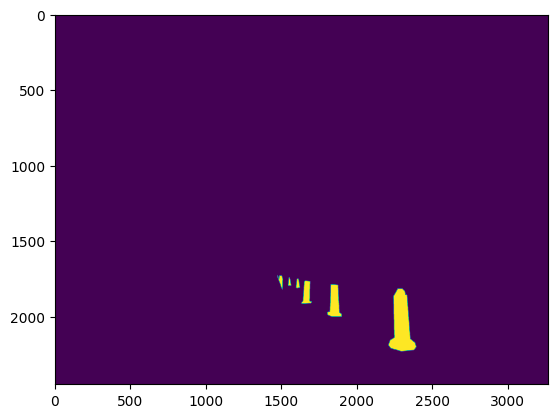

In [27]:
label_val_i_class_focused = convert_color_to_mask_class (label_val_i, img_breadth, img_length, [210, 60, 60], [250, 170, 35])
plt.imshow(array_to_img(label_val_i_class_focused))